### *** Analisando as primeira linhas ***

In [60]:
import pandas as pd
import numpy as np 

In [61]:
df = pd.read_csv('./ProjetoHackathon/engineers/data/Código Certo Coders.csv', delimiter=',')


In [62]:
df.head(5)

,Carimbo de data/hora,Nome Completo:,WhatsApp (Número),Interesse em Projetos Voluntários:,Nível de Experiência,Área(s) de Interesse:,Suas Principais Linguagens/Ferramentas:,"Seus Frameworks/Bibliotecas (Exemplo: Angular, React, Laravel...)",Disponibilidade de Horário:,"Preferências de Colaboração: (Trabalhar em equipe na área de TI é essencial para o sucesso de projetos. A colaboração permite a combinação de diversas habilidades e experiências, promove a troca de conhecimentos, estimula a criatividade e acelera o processo de aprendizado.)",Gostaria de Liderar Projetos?
0,2024/05/23 10:31:58 PM GMT-3,Lucas Lima Ribeiro,71997276542,Sim,Não Tenho Experiência,Desenvolvimento Full Stack;Desenvolvimento Web...,Java,Spring Boot,Tarde (12h - 18h),Gostaria de Colaborar em Equipe,"No momento, prefiro focar em desenvolvimento e..."
1,2024/05/23 10:32:11 PM GMT-3,Túlio Victor Pereira Santos,85986828297,Sim,Não Tenho Experiência,Desenvolvimento Full Stack;Desenvolvimento Web...,JavaScript;HTML/CSS;MySQL;Git/GitHub;,"React, Nest.js",Manhã (8h - 12h),Gostaria de Colaborar em Equipe,"No momento, prefiro focar em desenvolvimento e..."
2,2024/05/23 10:32:32 PM GMT-3,João Nunes dos Santos,47992465252,Sim,Não Tenho Experiência,Desenvolvimento Full Stack;Desenvolvimento Bac...,JavaScript;HTML/CSS;C#;MySQL;Git/GitHub,. NET e ASP.NET.,Manhã (8h - 12h),Gostaria de Colaborar em Equipe,"No momento, prefiro focar em desenvolvimento e..."
3,2024/05/23 10:34:22 PM GMT-3,Luis Gustavo,51993637152,Sim,Não Tenho Experiência,Desenvolvimento Web;Design UX/UI,JavaScript;HTML/CSS,React,Total Disponibilidade,Gostaria de Colaborar em Equipe,"No momento, prefiro focar em desenvolvimento e..."
4,2024/05/23 10:34:24 PM GMT-3,Dickson Sampaio de freitas neto,81992285821,Sim,Junior,Desenvolvimento Full Stack;Desenvolvimento Web,JavaScript;Java;MySQL;Git/GitHub,"Spring boot, React",Tarde (12h - 18h),Gostaria de Colaborar em Equipe,"No momento, prefiro focar em desenvolvimento e..."


### *** Conhecendo a Base de Dados ***

In [63]:
# Verificar valores ausentes em cada coluna
missing_values = df.isnull().sum()
print("Valores ausentes por coluna:")
print(missing_values)

Valores ausentes por coluna:
Carimbo de data/hora                                                                                                                                                                                                                                                                  0
Nome Completo:                                                                                                                                                                                                                                                                        0
WhatsApp (Número)                                                                                                                                                                                                                                                                     0
Interesse em Projetos Voluntários:                                                                                                 

In [64]:
df.shape

(171, 11)

In [65]:
df.columns

Index(['Carimbo de data/hora', 'Nome Completo:', 'WhatsApp (Número) ',
       'Interesse em Projetos Voluntários:', '  Nível de Experiência  ',
       'Área(s) de Interesse:', 'Suas Principais Linguagens/Ferramentas:',
       'Seus Frameworks/Bibliotecas (Exemplo: Angular, React, Laravel...)',
       'Disponibilidade de Horário:',
       'Preferências de Colaboração: (Trabalhar em equipe na área de TI é essencial para o sucesso de projetos. A colaboração permite a combinação de diversas habilidades e experiências, promove a troca de conhecimentos, estimula a criatividade e acelera o processo de aprendizado.)',
       'Gostaria de Liderar Projetos?'],
      dtype='object')

### **** Verificando valores Ausentes ****

In [66]:
df_cleaned = df.dropna()


In [67]:
# Verificar valores ausentes após tratamento
missing_values_cleaned = df_cleaned.isnull().sum()
print("Valores ausentes após tratamento:")
print(missing_values_cleaned)

Valores ausentes após tratamento:
Carimbo de data/hora                                                                                                                                                                                                                                                                  0
Nome Completo:                                                                                                                                                                                                                                                                        0
WhatsApp (Número)                                                                                                                                                                                                                                                                     0
Interesse em Projetos Voluntários:                                                                                            

### *** Verificando Dados Duplicados ***

In [68]:

duplicated_rows = df[df.duplicated()]
print(duplicated_rows)


Empty DataFrame
Columns: [Carimbo de data/hora, Nome Completo:, WhatsApp (Número) , Interesse em Projetos Voluntários:,   Nível de Experiência  , Área(s) de Interesse:, Suas Principais Linguagens/Ferramentas:, Seus Frameworks/Bibliotecas (Exemplo: Angular, React, Laravel...), Disponibilidade de Horário:, Preferências de Colaboração: (Trabalhar em equipe na área de TI é essencial para o sucesso de projetos. A colaboração permite a combinação de diversas habilidades e experiências, promove a troca de conhecimentos, estimula a criatividade e acelera o processo de aprendizado.), Gostaria de Liderar Projetos?]
Index: []


###  **** Conhecendo A Base de Dados *** 

C:\Users\marce\AppData\Local\Temp\ipykernel_19060\3521561185.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=coluna_experiencia, palette='viridis')


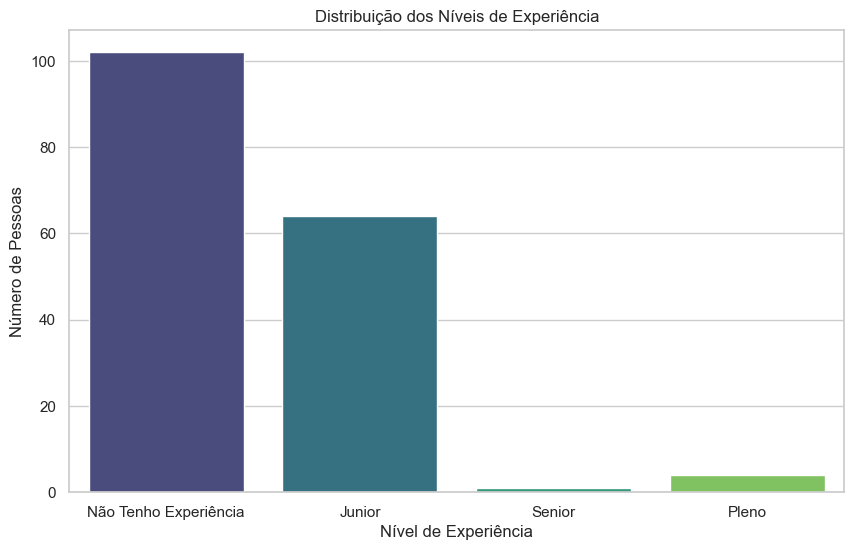

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Remover espaços em branco dos nomes das colunas
df.columns = df.columns.str.strip()

# Ajuste o nome da coluna conforme a necessidade
coluna_experiencia = 'Nível de Experiência'  # Nome correto da coluna

# Criar o gráfico de distribuição dos níveis de experiência
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x=coluna_experiencia, palette='viridis')
plt.xlabel('Nível de Experiência')
plt.ylabel('Número de Pessoas')
plt.title('Distribuição dos Níveis de Experiência')
plt.show()

C:\Users\marce\AppData\Local\Temp\ipykernel_19060\4179407833.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Disponibilidade de Horário:', palette='crest')


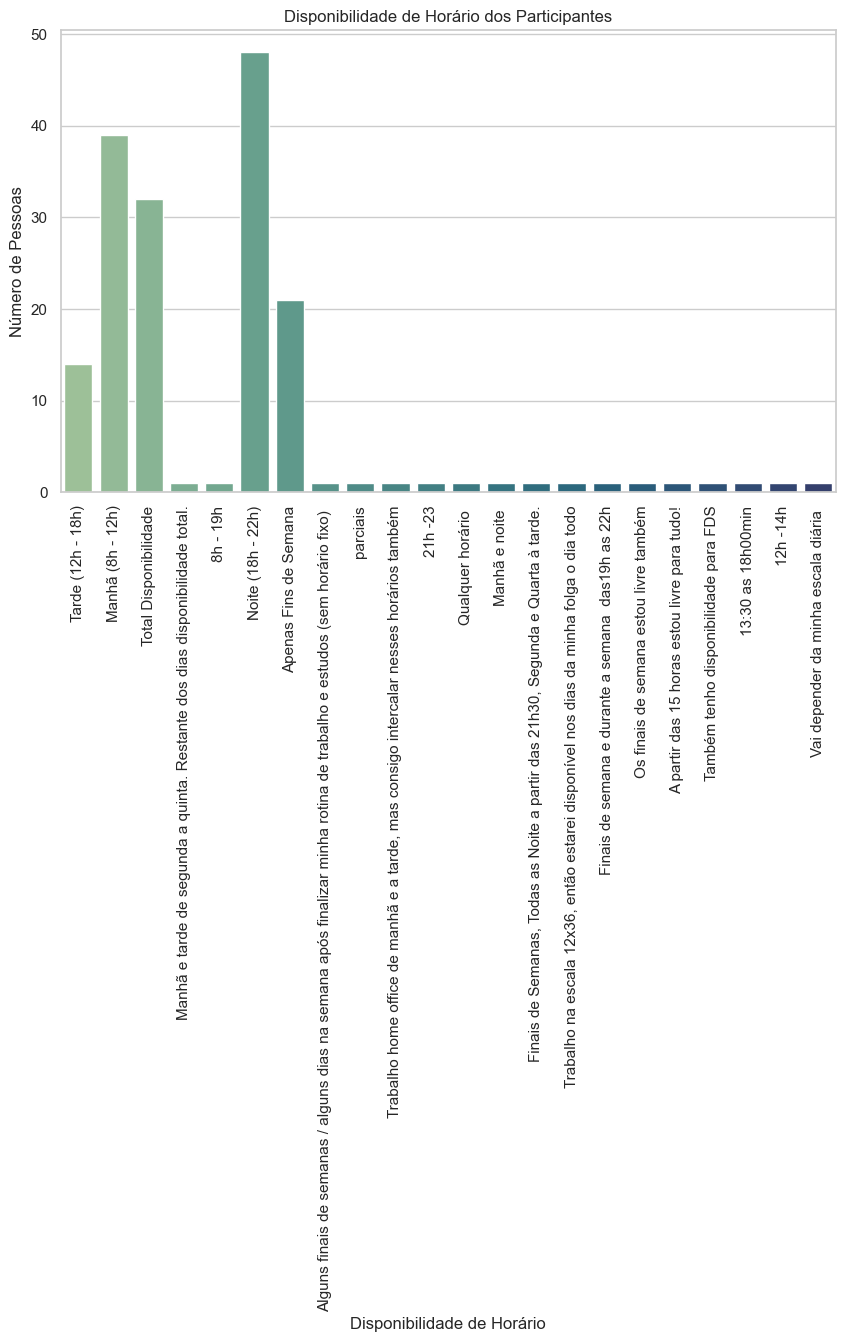

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o DataFrame
df = pd.read_csv('./ProjetoHackathon/engineers/data/Código Certo Coders.csv')  # Substitua pelo caminho do seu arquivo CSV

# Criar o gráfico de distribuição da disponibilidade de horário
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Disponibilidade de Horário:', palette='crest')
plt.xlabel('Disponibilidade de Horário')
plt.ylabel('Número de Pessoas')
plt.title('Disponibilidade de Horário dos Participantes')
plt.xticks(rotation=90)  # Rotaciona os labels do eixo x para melhor leitura
plt.show()


C:\Users\marce\AppData\Local\Temp\ipykernel_19060\617164795.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=area_counts.index, y=area_counts.values, palette='viridis')


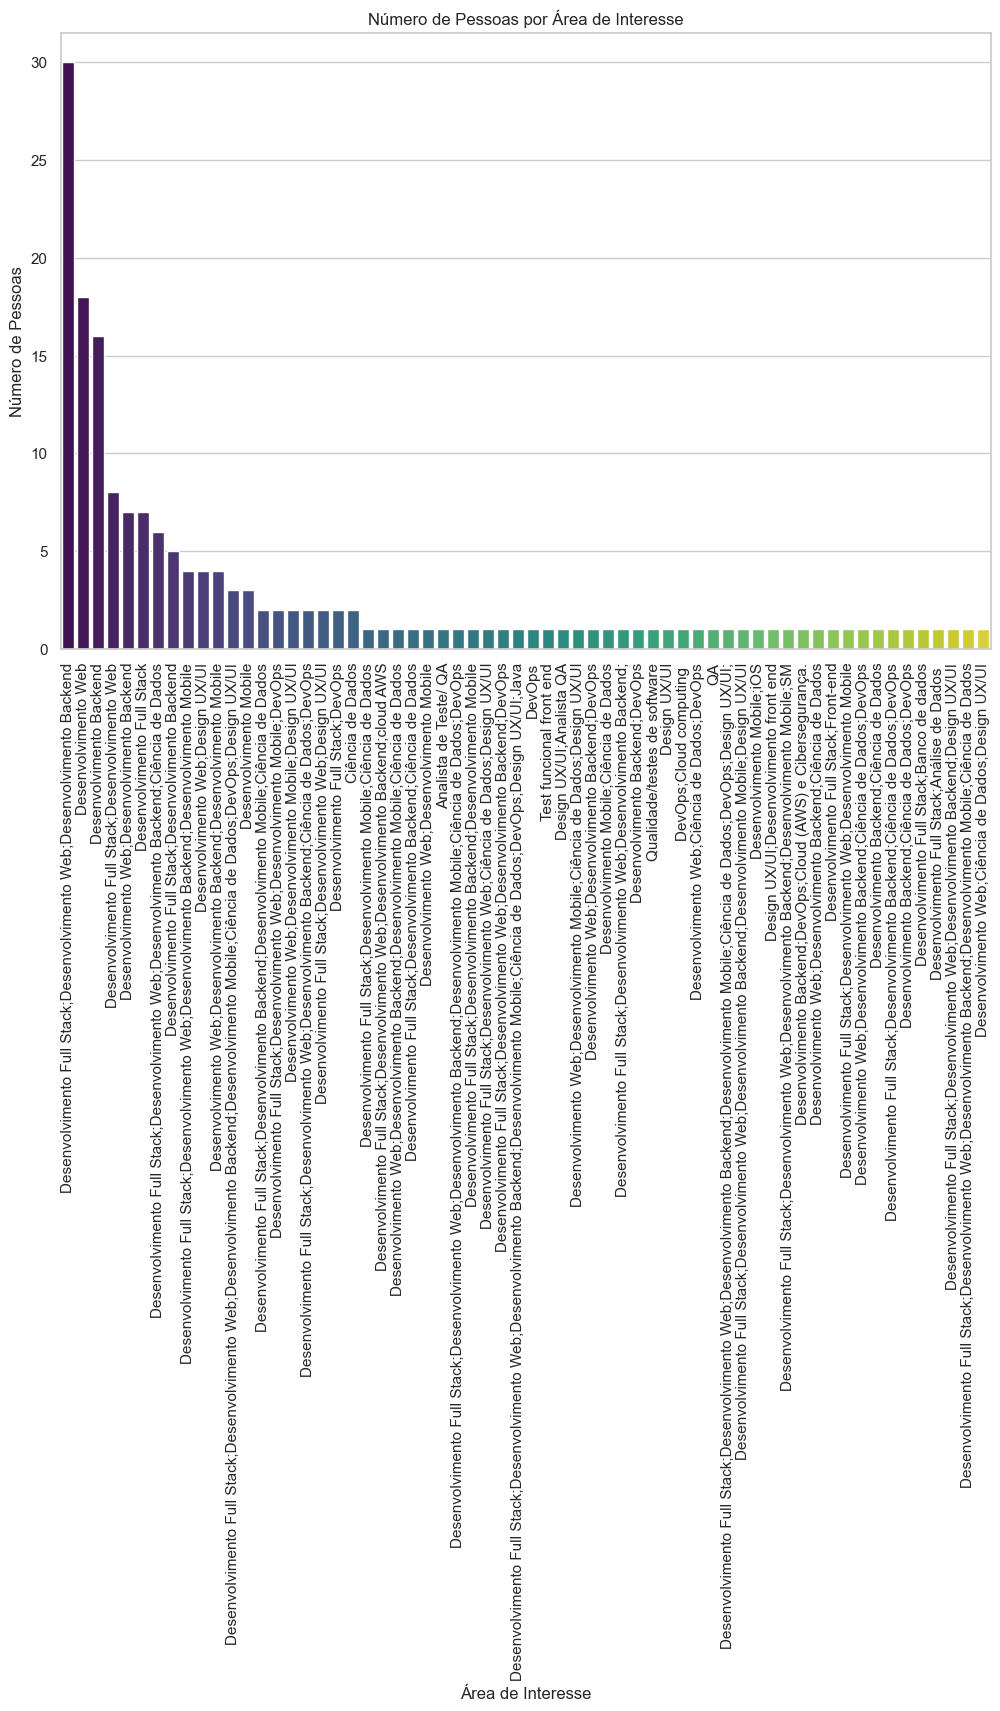

In [71]:
# Contar a frequência das áreas de interesse
area_counts = df['Área(s) de Interesse:'].value_counts()

# Criar o gráfico de barras para áreas de interesse
plt.figure(figsize=(12, 8))
sns.barplot(x=area_counts.index, y=area_counts.values, palette='viridis')
plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo x para melhor visualização
plt.xlabel('Área de Interesse')
plt.ylabel('Número de Pessoas')
plt.title('Número de Pessoas por Área de Interesse')
plt.show()


C:\Users\marce\AppData\Local\Temp\ipykernel_19060\3432556356.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Interesse em Projetos Voluntários:', palette='coolwarm')


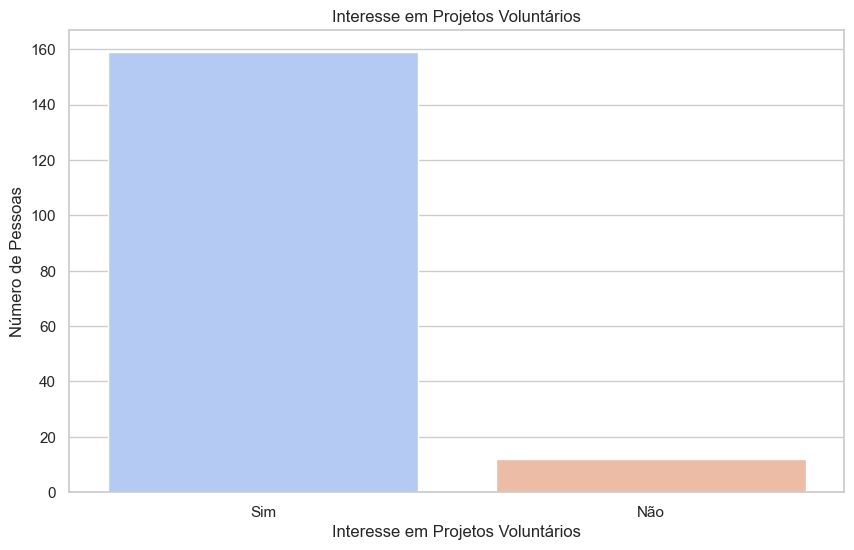

In [72]:
# Criar o gráfico de distribuição do interesse em projetos voluntários
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Interesse em Projetos Voluntários:', palette='coolwarm')
plt.xlabel('Interesse em Projetos Voluntários')
plt.ylabel('Número de Pessoas')
plt.title('Interesse em Projetos Voluntários')
plt.show()


C:\Users\marce\AppData\Local\Temp\ipykernel_19060\617164795.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=area_counts.index, y=area_counts.values, palette='viridis')


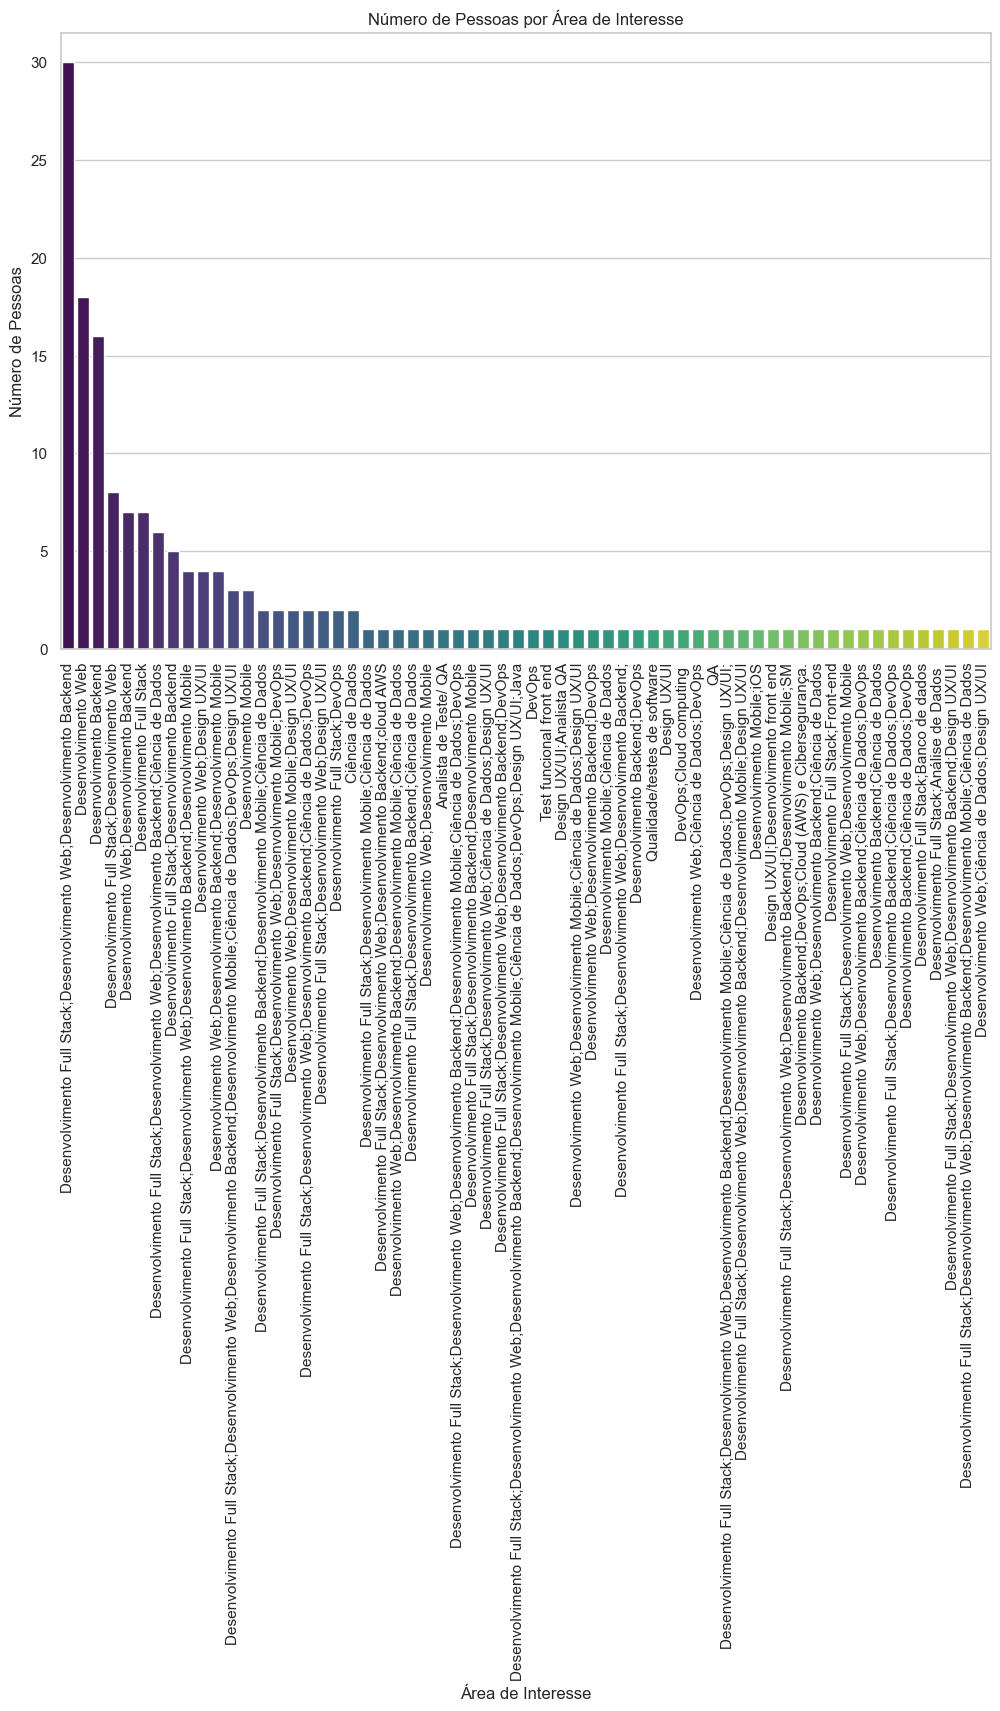

In [73]:
# Contar a frequência das áreas de interesse
area_counts = df['Área(s) de Interesse:'].value_counts()

# Criar o gráfico de barras para áreas de interesse
plt.figure(figsize=(12, 8))
sns.barplot(x=area_counts.index, y=area_counts.values, palette='viridis')
plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo x para melhor visualização
plt.xlabel('Área de Interesse')
plt.ylabel('Número de Pessoas')
plt.title('Número de Pessoas por Área de Interesse')
plt.show()


C:\Users\marce\AppData\Local\Temp\ipykernel_19060\3500319333.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tools_counts.index, y=tools_counts.values, palette='magma')


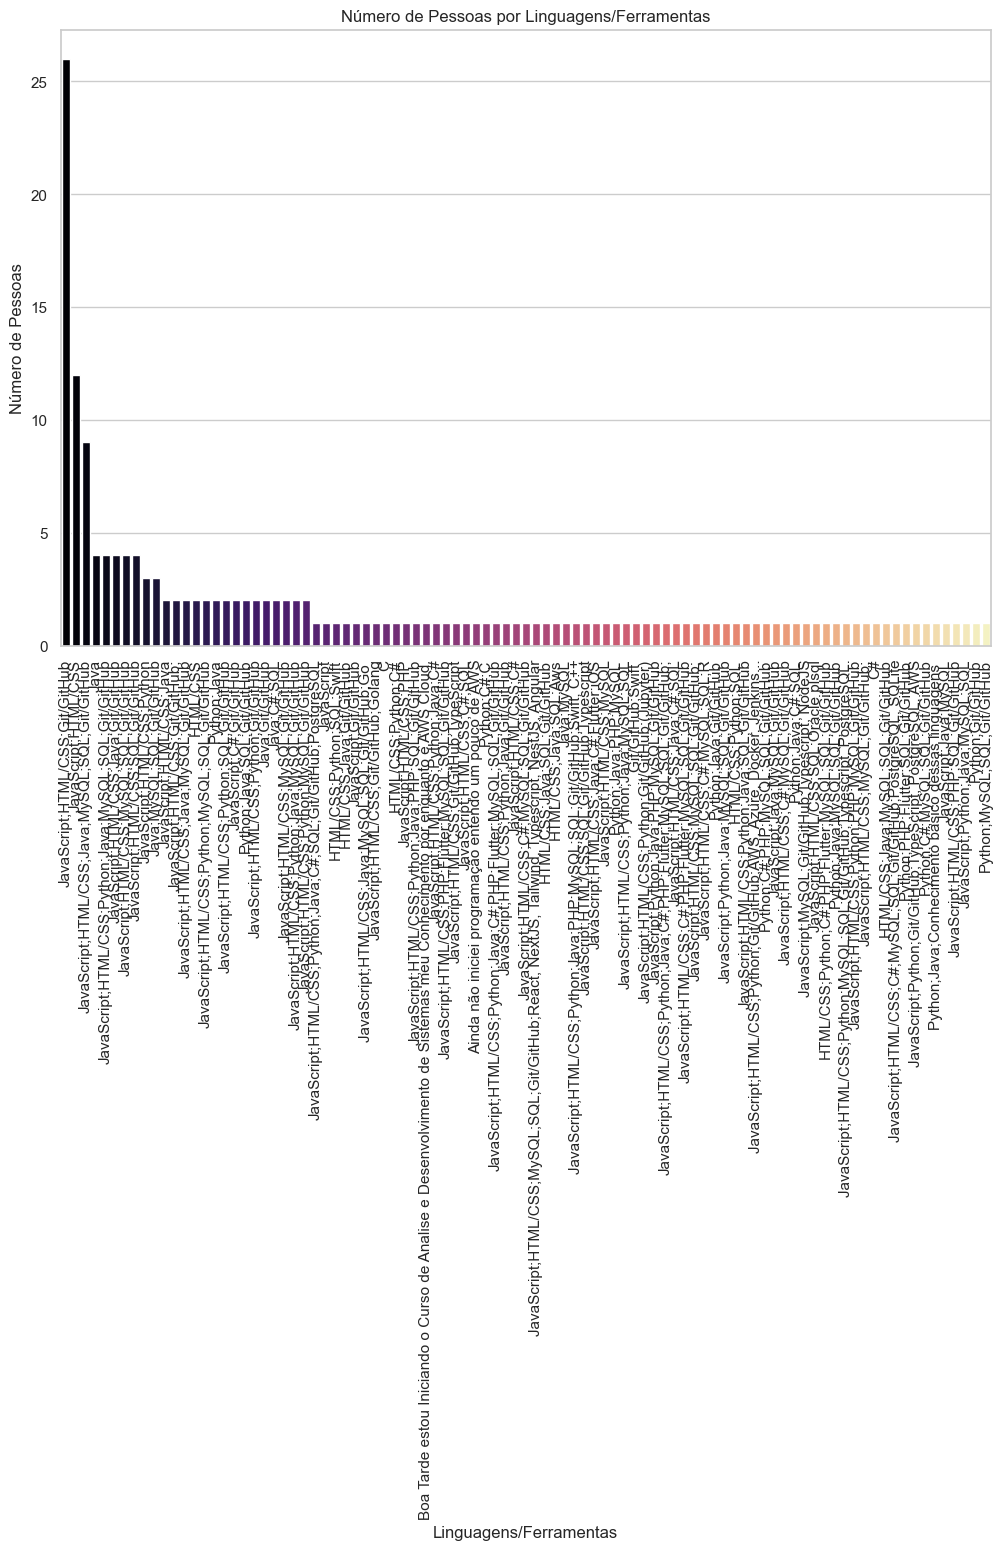

In [74]:
# Contar a frequência das linguagens/ferramentas
tools_counts = df['Suas Principais Linguagens/Ferramentas:'].value_counts()

# Criar o gráfico de barras para linguagens/ferramentas
plt.figure(figsize=(12, 8))
sns.barplot(x=tools_counts.index, y=tools_counts.values, palette='magma')
plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo x para melhor visualização
plt.xlabel('Linguagens/Ferramentas')
plt.ylabel('Número de Pessoas')
plt.title('Número de Pessoas por Linguagens/Ferramentas')
plt.show()


C:\Users\marce\AppData\Local\Temp\ipykernel_19060\2937336740.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Disponibilidade de Horário:', palette='crest')


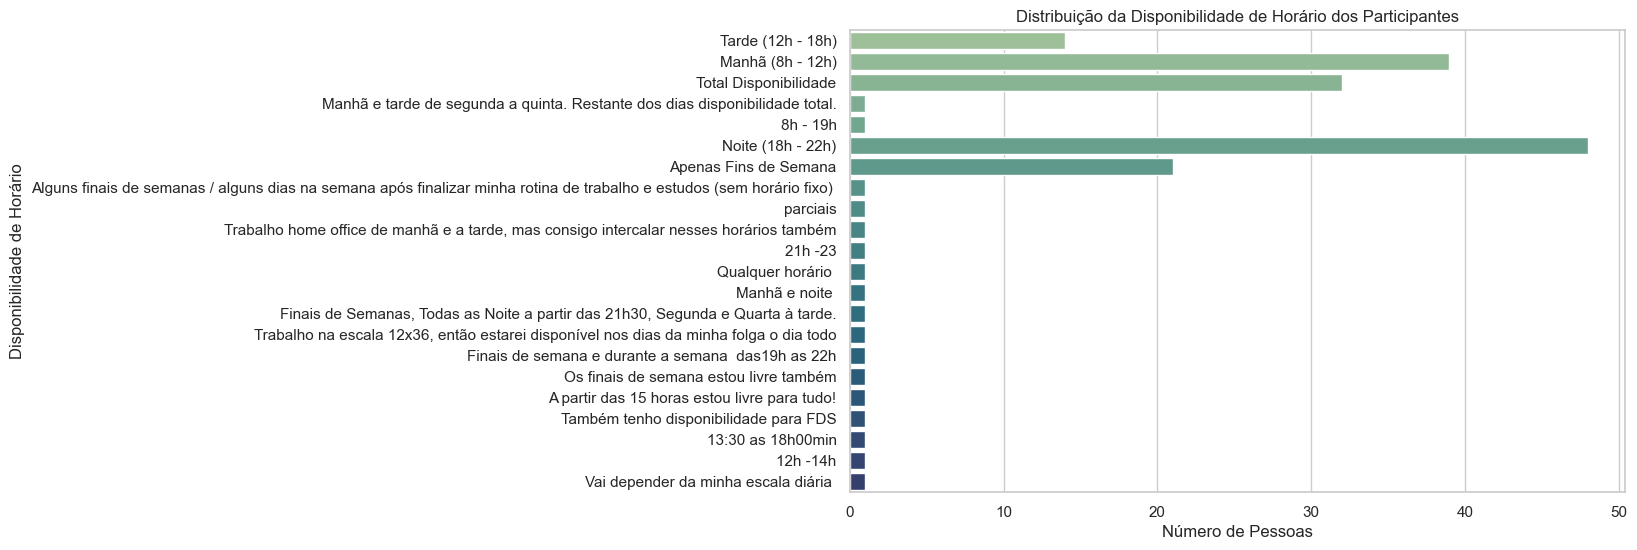

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Configurar o estilo dos gráficos
sns.set(style="whitegrid")

# Criar o gráfico de distribuição da disponibilidade de horário
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Disponibilidade de Horário:', palette='crest')
plt.ylabel('Disponibilidade de Horário')
plt.xlabel('Número de Pessoas')
plt.title('Distribuição da Disponibilidade de Horário dos Participantes')
plt.show()


C:\Users\marce\AppData\Local\Temp\ipykernel_19060\4232409879.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Preferências de Colaboração: (Trabalhar em equipe na área de TI é essencial para o sucesso de projetos. A colaboração permite a combinação de diversas habilidades e experiências, promove a troca de conhecimentos, estimula a criatividade e acelera o processo de aprendizado.)', palette='plasma')


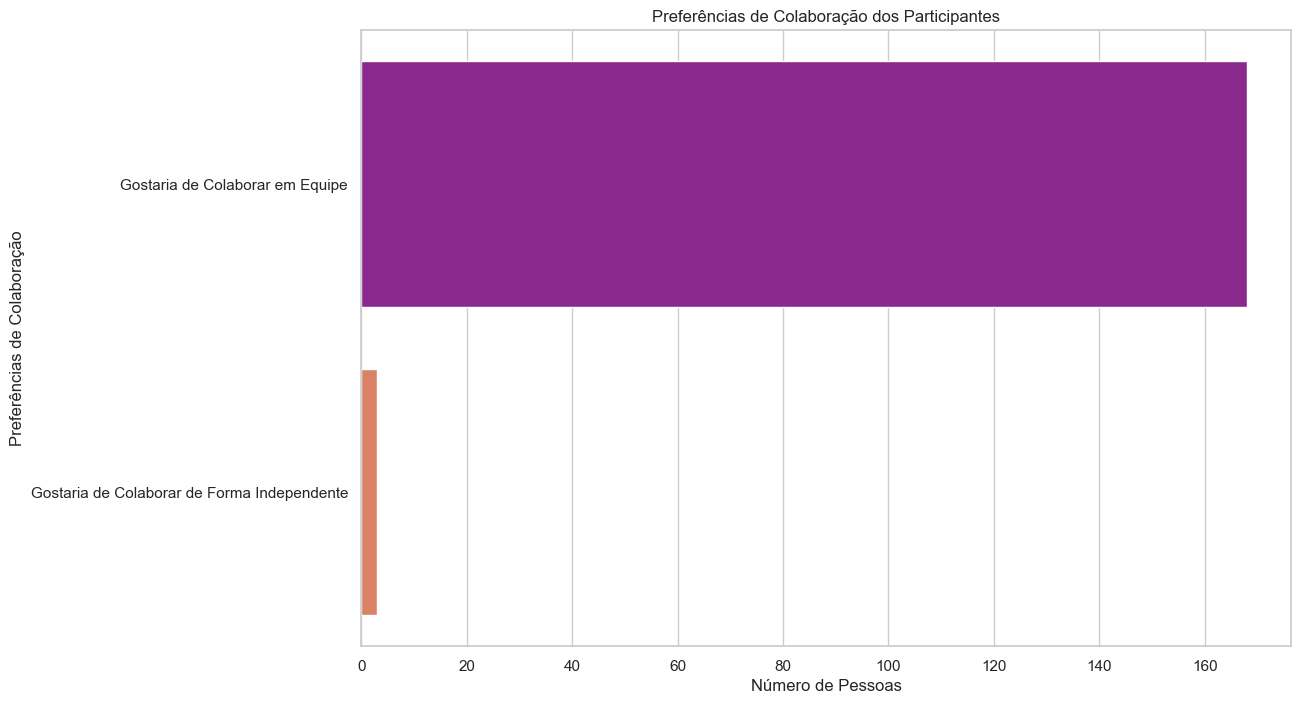

In [76]:
# Criar o gráfico de distribuição das preferências de colaboração
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='Preferências de Colaboração: (Trabalhar em equipe na área de TI é essencial para o sucesso de projetos. A colaboração permite a combinação de diversas habilidades e experiências, promove a troca de conhecimentos, estimula a criatividade e acelera o processo de aprendizado.)', palette='plasma')
plt.xlabel('Número de Pessoas')
plt.ylabel('Preferências de Colaboração')
plt.title('Preferências de Colaboração dos Participantes')
plt.show()


In [77]:
df.columns

Index(['Carimbo de data/hora', 'Nome Completo:', 'WhatsApp (Número) ',
       'Interesse em Projetos Voluntários:', '  Nível de Experiência  ',
       'Área(s) de Interesse:', 'Suas Principais Linguagens/Ferramentas:',
       'Seus Frameworks/Bibliotecas (Exemplo: Angular, React, Laravel...)',
       'Disponibilidade de Horário:',
       'Preferências de Colaboração: (Trabalhar em equipe na área de TI é essencial para o sucesso de projetos. A colaboração permite a combinação de diversas habilidades e experiências, promove a troca de conhecimentos, estimula a criatividade e acelera o processo de aprendizado.)',
       'Gostaria de Liderar Projetos?'],
      dtype='object')

In [96]:
# Remover espaços em branco dos nomes das colunas
df.columns = df.columns.str.strip()

# Tabela para a distribuição dos níveis de experiência
experience_counts = df['Nível de Experiência'].value_counts()
print("Distribuição dos Níveis de Experiência: ")
print(experience_counts)

# Tabela para o interesse em projetos voluntários
volunteer_interest_counts = df['Interesse em Projetos Voluntários:'].value_counts()
print("\nInteresse em Projetos Voluntários:")
print(volunteer_interest_counts)

# Tabela para as áreas de interesse
area_counts = df['Área(s) de Interesse:'].value_counts()
print("\nÁreas de Interesse:")
print(area_counts)

# Tabela para linguagens/ferramentas principais
tools_counts = df['Suas Principais Linguagens/Ferramentas:'].value_counts()
print("\nPrincipais Linguagens/Ferramentas:")
print(tools_counts)


# Tabela para disponibilidade de horário
availability_counts = df['Disponibilidade de Horário:'].value_counts()
print("\nDisponibilidade de Horário:")
print(availability_counts)


Distribuição dos Níveis de Experiência: 
Nível de Experiência
Não Tenho Experiência    102
Junior                    64
Pleno                      4
Senior                     1
Name: count, dtype: int64

Interesse em Projetos Voluntários:
Interesse em Projetos Voluntários:
Sim    159
Não     12
Name: count, dtype: int64

Áreas de Interesse:
Área(s) de Interesse:
Desenvolvimento Full Stack;Desenvolvimento Web;Desenvolvimento Backend                                            30
Desenvolvimento Web                                                                                               18
Desenvolvimento Backend                                                                                           16
Desenvolvimento Full Stack;Desenvolvimento Web                                                                     8
Desenvolvimento Web;Desenvolvimento Backend                                                                        7
                                                 

### *** preparando os dados ***

In [97]:
from sklearn.preprocessing import LabelEncoder

# Criar uma cópia do DataFrame para transformação
df_transformed = df.copy()

# Transformar variáveis categóricas em numéricas
label_encoders = {}
categorical_columns = [
    'Nível de Experiência',
    'Interesse em Projetos Voluntários:',
    'Preferências de Colaboração: (Trabalhar em equipe na área de TI é essencial para o sucesso de projetos. A colaboração permite a combinação de diversas habilidades e experiências, promove a troca de conhecimentos, estimula a criatividade e acelera o processo de aprendizado.)',
    'Disponibilidade de Horário:'
]

for col in categorical_columns:
    le = LabelEncoder()
    df_transformed[col] = le.fit_transform(df_transformed[col].astype(str))
    label_encoders[col] = le

# Transformar as áreas de interesse e linguagens/ferramentas usando contagem de palavras
df_transformed['Áreas de Interesse:'] = df['Área(s) de Interesse:'].str.split(';').apply(len)
df_transformed['Principais Linguagens/Ferramentas:'] = df['Suas Principais Linguagens/Ferramentas:'].str.split(';').apply(len)


In [98]:
# Selecionar as colunas relevantes para o clustering
features = [
    'Nível de Experiência',
    'Interesse em Projetos Voluntários:',
    'Preferências de Colaboração: (Trabalhar em equipe na área de TI é essencial para o sucesso de projetos. A colaboração permite a combinação de diversas habilidades e experiências, promove a troca de conhecimentos, estimula a criatividade e acelera o processo de aprendizado.)',
    'Disponibilidade de Horário:',
    'Áreas de Interesse:',
    'Principais Linguagens/Ferramentas:'
]

X = df_transformed[features]


### **** Aplicando o algoritmo de K-Meams ****

In [99]:
from sklearn.cluster import KMeans

# Definir o número de clusters (ajustar conforme necessário)
num_clusters = 8

# Aplicar o K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
df_transformed['Cluster'] = kmeans.fit_predict(X)

# Exibir o resultado do clustering
print(df_transformed[['Nome Completo:', 'Cluster']])


                             Nome Completo:  Cluster
0                       Lucas Lima Ribeiro         0
1               Túlio Victor Pereira Santos        1
2                     João Nunes dos Santos        1
3                             Luis Gustavo         0
4           Dickson Sampaio de freitas neto        0
..                                      ...      ...
166     Thiago Henrique Linhares de Araújo         0
167  Thiago André Paraiso Costa Vasconcelos        1
168   Julia Ribeiro Belline de Vasconcelos         5
169                 Bianca Peres dos Santos        5
170                         Poliana Almeida        3

[171 rows x 2 columns]


C:\Users\marce\AppData\Local\Temp\ipykernel_19060\2166441361.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_transformed, x='Cluster', palette='crest')


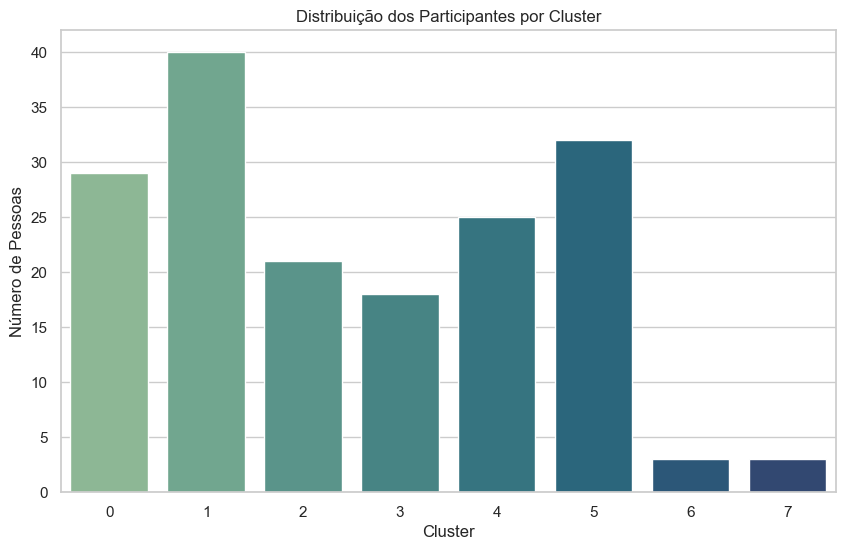

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar a distribuição dos clusters
plt.figure(figsize=(10, 6))
sns.countplot(data=df_transformed, x='Cluster', palette='crest')
plt.xlabel('Cluster')
plt.ylabel('Número de Pessoas')
plt.title('Distribuição dos Participantes por Cluster')
plt.show()


In [101]:
from pulp import LpMaximize, LpProblem, LpVariable, lpSum, LpInteger, PULP_CBC_CMD

# Dados
clusters = {
    0: 29,
    1: 40,
    2: 21,
    3: 18,
    4: 25,
    5: 32,
    6: 3,
    7: 3
}
num_teams = 28  # Definir um número aproximado de equipes
team_min_size = 6
team_max_size = 8

# Variáveis
members = []
teams = list(range(num_teams))

# Criar uma lista de membros no formato (cluster_id, member_id)
member_ids = [(cluster_id, member_id) for cluster_id in clusters for member_id in range(clusters[cluster_id])]

# Definir o problema
prob = LpProblem("Formacao_Equipes", LpMaximize)

# Variáveis de decisão: x[i, j] = 1 se o membro i está na equipe j
x = LpVariable.dicts("x", (range(len(member_ids)), teams), cat=LpInteger, lowBound=0, upBound=1)

# Função objetivo (pode ser ajustada conforme necessário)
prob += lpSum(x[m][t] for m in range(len(member_ids)) for t in teams), "Maximize_members_in_teams"

# Restrições
# Cada membro deve estar em exatamente uma equipe
for m in range(len(member_ids)):
    prob += lpSum(x[m][t] for t in teams) == 1

# Cada equipe deve ter entre 6 e 8 membros
for t in teams:
    prob += lpSum(x[m][t] for m in range(len(member_ids))) >= team_min_size
    prob += lpSum(x[m][t] for m in range(len(member_ids))) <= team_max_size

# Resolver o problema
prob.solve(PULP_CBC_CMD(msg=0))

# Mostrar resultados
team_allocations = {team_id: [] for team_id in teams}

for t in teams:
    for m in range(len(member_ids)):
        if x[m][t].varValue == 1:
            cluster_id, member_id = member_ids[m]
            team_allocations[t].append((cluster_id, member_id))

# Exibir alocação de membros por equipe
for team_id, members in team_allocations.items():
    print(f"Equipe {team_id + 1}: {len(members)} membros")
    for cluster_id, member_id in members:
        print(f"  Membro do Cluster {cluster_id} com ID {member_id}")
    print()


Equipe 1: 8 membros
  Membro do Cluster 0 com ID 0
  Membro do Cluster 0 com ID 9
  Membro do Cluster 0 com ID 17
  Membro do Cluster 1 com ID 25
  Membro do Cluster 1 com ID 38
  Membro do Cluster 3 com ID 9
  Membro do Cluster 5 com ID 4
  Membro do Cluster 5 com ID 16

Equipe 2: 6 membros
  Membro do Cluster 1 com ID 13
  Membro do Cluster 1 com ID 36
  Membro do Cluster 2 com ID 5
  Membro do Cluster 4 com ID 7
  Membro do Cluster 4 com ID 15
  Membro do Cluster 7 com ID 1

Equipe 3: 6 membros
  Membro do Cluster 0 com ID 19
  Membro do Cluster 1 com ID 34
  Membro do Cluster 2 com ID 13
  Membro do Cluster 2 com ID 16
  Membro do Cluster 4 com ID 14
  Membro do Cluster 5 com ID 17

Equipe 4: 6 membros
  Membro do Cluster 0 com ID 18
  Membro do Cluster 1 com ID 0
  Membro do Cluster 1 com ID 21
  Membro do Cluster 2 com ID 20
  Membro do Cluster 3 com ID 12
  Membro do Cluster 5 com ID 2

Equipe 5: 6 membros
  Membro do Cluster 1 com ID 2
  Membro do Cluster 1 com ID 8
  Membro do

In [104]:
clusters

{0: 29, 1: 40, 2: 21, 3: 18, 4: 25, 5: 32, 6: 3, 7: 3}

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
from pulp import LpMaximize, LpProblem, LpVariable, lpSum, LpInteger, PULP_CBC_CMD


# Adicionar a coluna 'Grupo', que mapeia o cluster para o número do grupo (de 1 a 8)
df_transformed['Grupo'] = df_transformed['Cluster'] + 1

# Preparar as variáveis para a otimização
clusters = df_transformed['Cluster'].value_counts().to_dict()
num_teams = 28  # Definir um número aproximado de equipes
team_min_size = 6
team_max_size = 8

# Criar uma lista de membros no formato (cluster_id, member_id)
member_ids = [(cluster_id, member_id) for cluster_id in clusters for member_id in range(clusters[cluster_id])]

# Definir o problema
prob = LpProblem("Formacao_Equipes", LpMaximize)

# Variáveis de decisão: x[i, j] = 1 se o membro i está na equipe j
x = LpVariable.dicts("x", (range(len(member_ids)), range(num_teams)), cat=LpInteger, lowBound=0, upBound=1)

# Função objetivo
prob += lpSum(x[m][t] for m in range(len(member_ids)) for t in range(num_teams)), "Maximize_members_in_teams"

# Cada membro deve estar em exatamente uma equipe
for m in range(len(member_ids)):
    prob += lpSum(x[m][t] for t in range(num_teams)) == 1

# Cada equipe deve ter entre 6 e 8 membros
for t in range(num_teams):
    prob += lpSum(x[m][t] for m in range(len(member_ids))) >= team_min_size
    prob += lpSum(x[m][t] for m in range(len(member_ids))) <= team_max_size

# Resolver o problema
prob.solve(PULP_CBC_CMD(msg=0))

# Mostrar resultados e mapear membros para equipes
team_allocations = {team_id: [] for team_id in range(num_teams)}

for t in range(num_teams):
    for m in range(len(member_ids)):
        if x[m][t].varValue == 1:
            cluster_id, member_id = member_ids[m]
            team_allocations[t].append((cluster_id, member_id))

# Mapear membro_id para dados
member_info = df_transformed[['Nome Completo:', 'WhatsApp (Número)', 'Área(s) de Interesse:', 'Cluster']].to_dict('index')

# Criar DataFrame para o resultado final
result_data = []
for team_id, members in team_allocations.items():
    for cluster_id, member_id in members:
        # Adicionar informações do membro
        member_data = member_info[member_id]
        result_data.append({
            'Nome Completo': member_data['Nome Completo:'],
            'Área de Interesse': member_data['Área(s) de Interesse:'],
            'WhatsApp': member_data['WhatsApp (Número)'],
            'Grupo': team_id + 1
        })

# Criar DataFrame e exportar para CSV
df_result = pd.DataFrame(result_data)
df_result.to_csv("alocacao_equipe.csv", index=False)

print("Arquivo CSV gerado com sucesso!")

# Criar um dicionário para armazenar os membros por grupo
group_members = {f'Grupo {i + 1}': [] for i in range(num_teams)}

# Preencher o dicionário com os dados dos membros
for index, row in df_result.iterrows():
    group_members[f'Grupo {row["Grupo"]}'].append({
        'Nome Completo': row['Nome Completo'],
        'Área de Interesse': row['Área de Interesse'],
        'WhatsApp': row['WhatsApp']
    })

# Função para exibir membros de um grupo específico
def print_group_members(group_number):
    group_key = f'Grupo {group_number}'
    if group_key in group_members:
        print(f"\nMembros do {group_key}:")
        for member in group_members[group_key]:
            print(f"Nome: {member['Nome Completo']}, Área de Interesse: {member['Área de Interesse']}, WhatsApp: {member['WhatsApp']}")
    else:
        print(f"Grupo {group_number} não encontrado.")

# Exemplo: imprimir membros do grupo 1
print_group_members(1)

# Contar o número de membros por grupo
group_counts = {key: len(members) for key, members in group_members.items()}


Arquivo CSV gerado com sucesso!

Membros do Grupo 1:
Nome: Lucas Lima Ribeiro , Área de Interesse: Desenvolvimento Full Stack;Desenvolvimento Web;Desenvolvimento Backend;Desenvolvimento Mobile, WhatsApp: 71997276542
Nome: Rodrigo Teixeira de Andrade, Área de Interesse: Desenvolvimento Full Stack;Desenvolvimento Web;Desenvolvimento Backend, WhatsApp: 19999680203
Nome: Maria Leilane, Área de Interesse: Desenvolvimento Full Stack;Desenvolvimento Web;Desenvolvimento Backend, WhatsApp: 14982123568
Nome: José Carlos da Silva Filho , Área de Interesse: Desenvolvimento Full Stack;Desenvolvimento Web;Desenvolvimento Mobile, WhatsApp: (81) 99692-7545
Nome: Alessandro oliveira , Área de Interesse: Desenvolvimento Full Stack;Desenvolvimento Mobile;Ciência de Dados, WhatsApp: 85987054329
Nome: Alessandro oliveira , Área de Interesse: Desenvolvimento Full Stack;Desenvolvimento Mobile;Ciência de Dados, WhatsApp: 85987054329
Nome: Caroline Lázaro da Silva , Área de Interesse: Desenvolvimento Full Stac

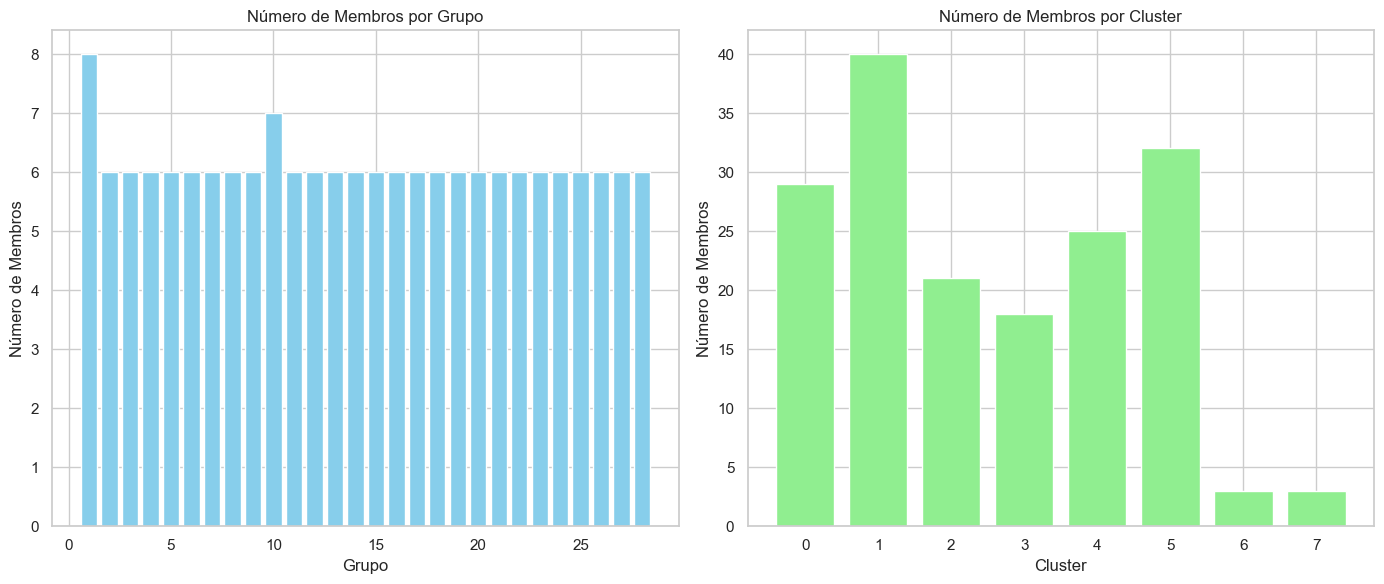

In [110]:
# Criar gráficos de visualização
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de distribuição de membros por equipe
team_sizes = df_result['Grupo'].value_counts().sort_index()
ax[0].bar(team_sizes.index, team_sizes.values, color='skyblue')
ax[0].set_title('Número de Membros por Grupo')
ax[0].set_xlabel('Grupo')
ax[0].set_ylabel('Número de Membros')

# Gráfico de distribuição de membros por cluster
cluster_sizes = df_transformed['Cluster'].value_counts().sort_index()
ax[1].bar(cluster_sizes.index, cluster_sizes.values, color='lightgreen')
ax[1].set_title('Número de Membros por Cluster')
ax[1].set_xlabel('Cluster')
ax[1].set_ylabel('Número de Membros')

plt.tight_layout()
plt.show()
